In [9]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import StandardScaler
import gc
import matplotlib.pyplot as plt
import pickle
import torch
from utils.preprocess_utils import *

In [10]:
nontime = pd.read_csv('data/original/nontime_data.txt', sep = ' ')
time = pd.read_csv('data/original/time_data.txt', sep = ' ')

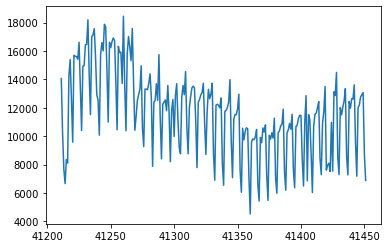

In [11]:
plt.plot(time[(time.HDONG_NM == '중림동')&
        (time.time == 'evening')].flow_pop)

In [4]:
# load data
time_data = pd.read_csv('data/original/time_data.txt', sep  = ' ') 
time_data = df2npy(time_data)
morning_data = time_data[:,2,:,:]
lunch_data = time_data[:,1,:,:]
evening_data = time_data[:,0,:,:]

morning_data, train_valid_test_loc_index, m_time_scaler = split_train_valid_test(morning_data)
evening_data, _, e_time_scaler = split_train_valid_test(evening_data)
nontime_data = pd.read_csv('data/original/nontime_data.txt', sep = ' ')
notime, no_time_scaler = split_notime_data(nontime_data, train_valid_test_loc_index)


In [5]:
code_list = evening_data[0][:,0,0]
for idx, code in enumerate(code_list):
    if code == time[time.HDONG_NM == '중림동'].HDONG_CD.iloc[0]:
        print(idx)

11


In [6]:
def append_trend_cycle(flow_pop):
    new_flow_pop = np.zeros([len(flow_pop), 2])
    #new_flow_pop[:, 0] = seq2cycle(flow_pop)[ROLLSIZE:]
    new_flow_pop[:, 0] = seq2cycle_weight(flow_pop)
    new_flow_pop[:, 1] = flow_pop - new_flow_pop[:, 0]
    #print(new_flow_pop)
    return new_flow_pop

def split_sequence(sequence, target_index  = 2):
    seq_x = sequence[:, :]
    trend_cycle_x = append_trend_cycle(seq_x[:,target_index])
    seq_x = np.concatenate([seq_x[ROLLSIZE:,:],
                            trend_cycle_x[ROLLSIZE:]], axis = 1)
    return seq_x

In [7]:
time_data = evening_data[3][:,-24:,:]
notime_data = notime
x_time = []
x_notime = []

for loc in range(len(time_data)):
    loc_code = time_data[loc,0,0]
    x = split_sequence(time_data[loc,:,:])
    x_time.append(x.reshape(1, x.shape[0], x.shape[1]))
    no_time = notime_data.loc[loc_code]
    aug_notime = np.zeros(3)
    aug_notime[:] = no_time
    x_notime.append(aug_notime.reshape(1,-1))

x_time = np.concatenate(x_time)
x_notime = np.concatenate(x_notime)

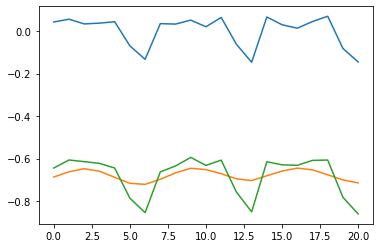

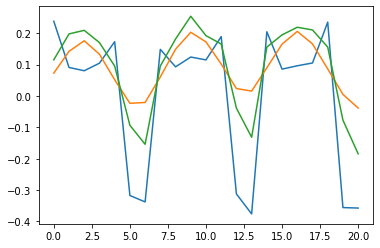

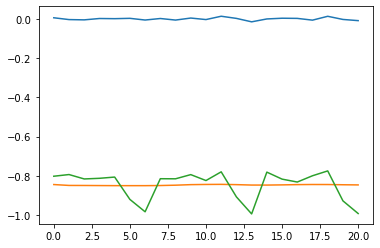

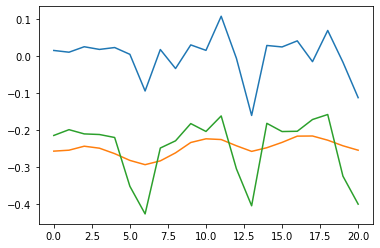

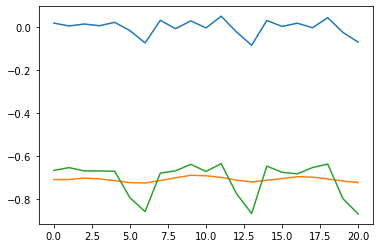

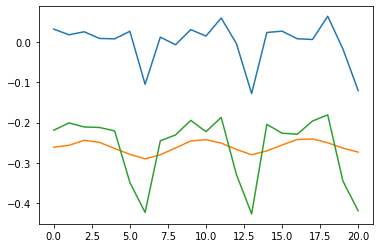

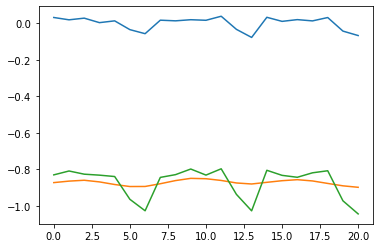

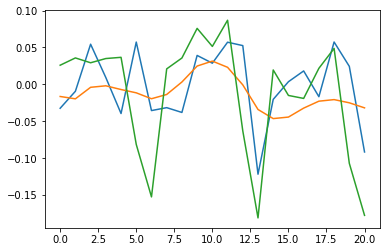

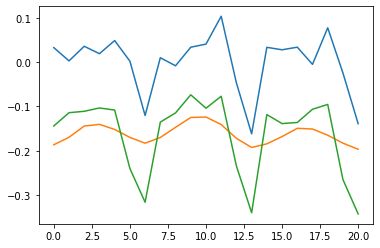

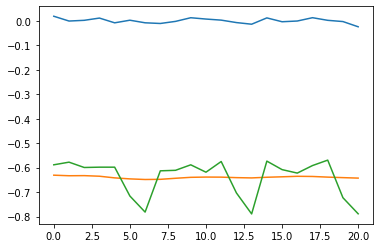

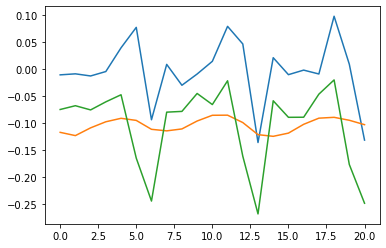

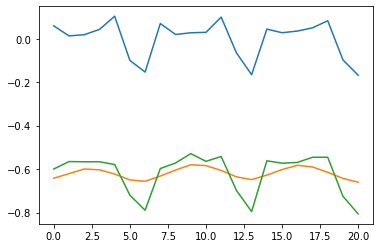

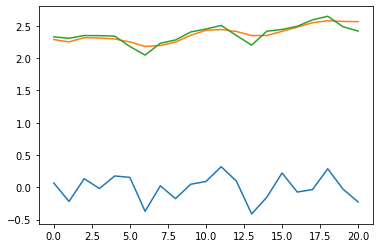

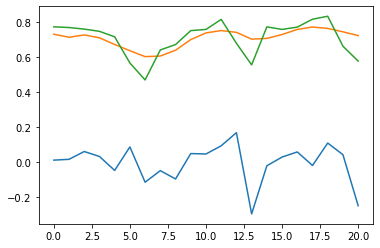

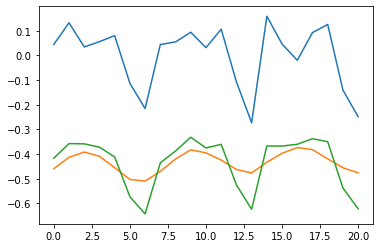

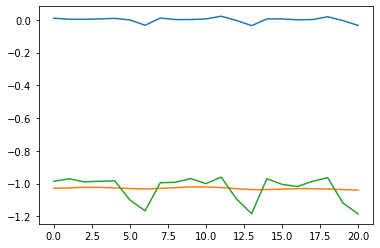

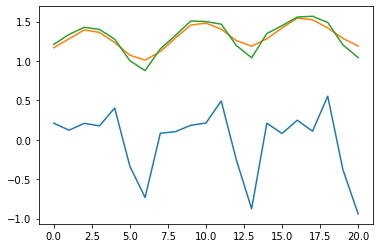

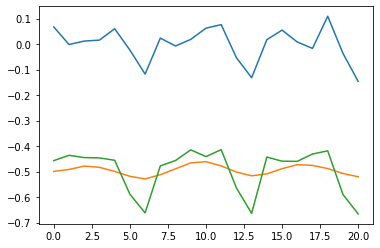

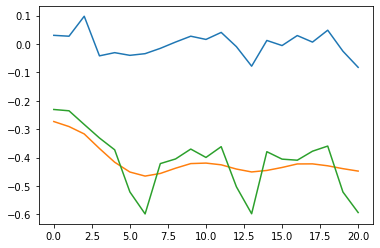

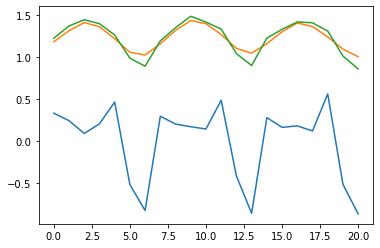

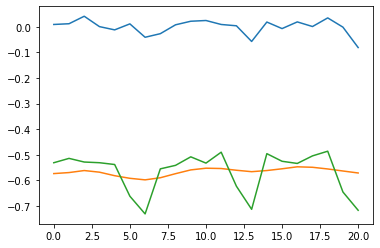

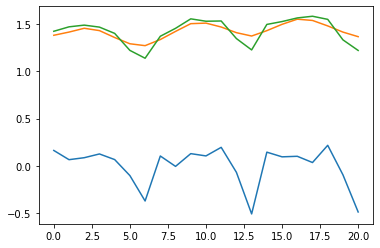

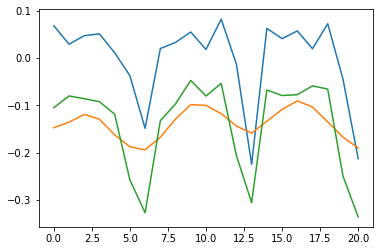

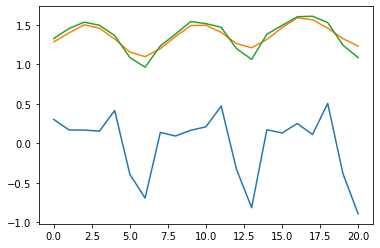

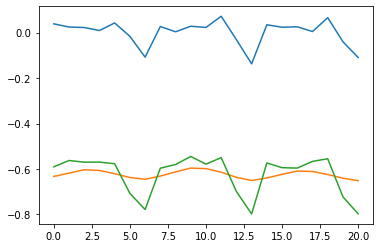

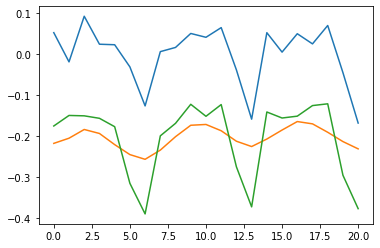

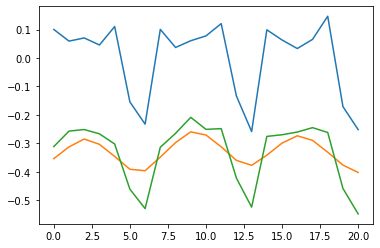

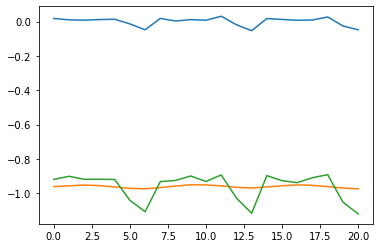

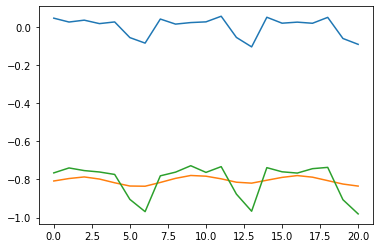

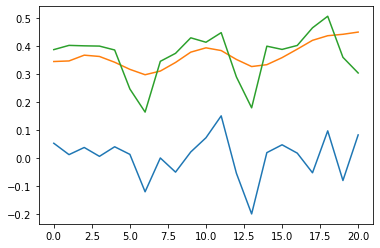

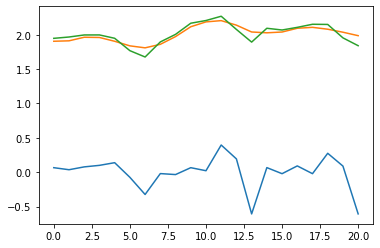

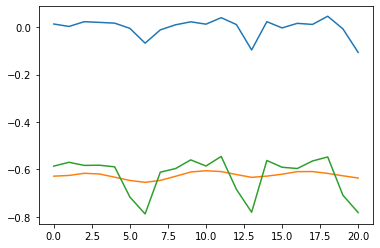

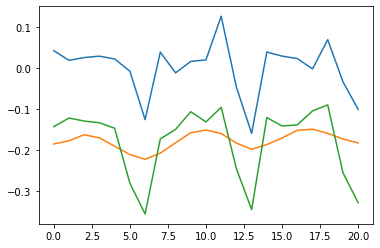

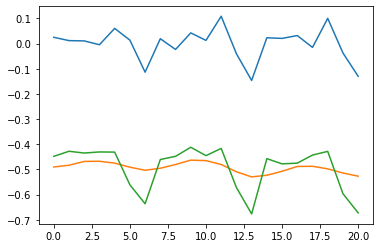

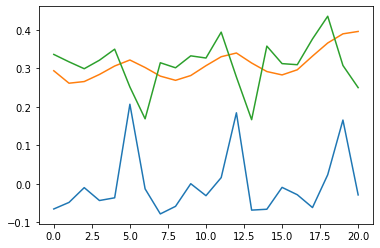

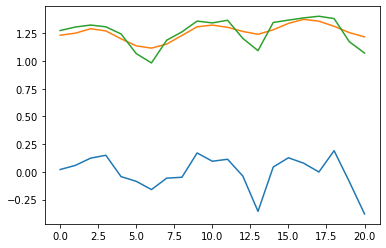

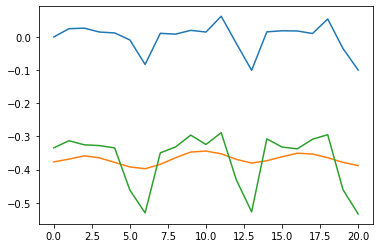

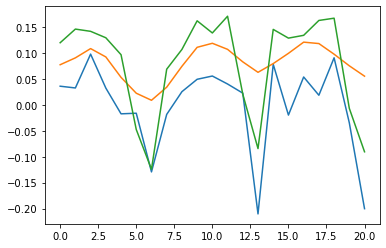

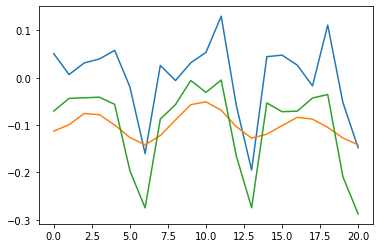

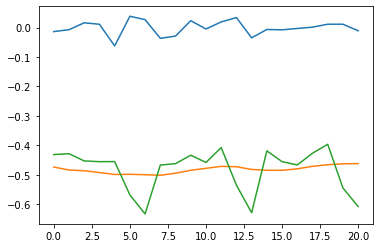

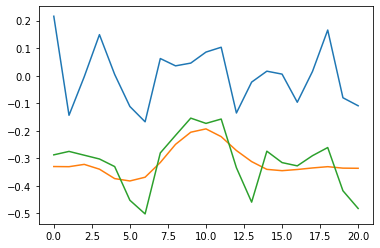

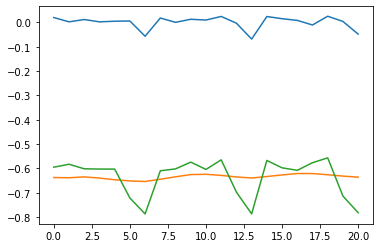

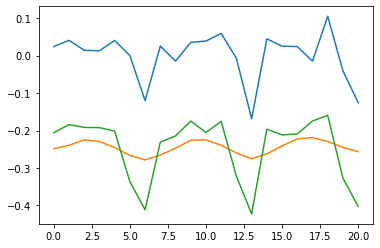

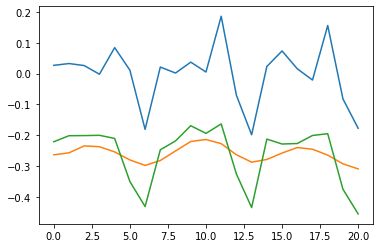

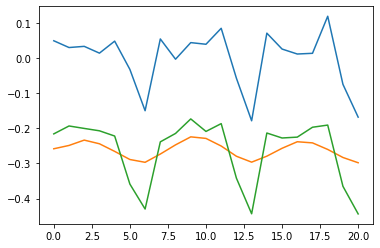

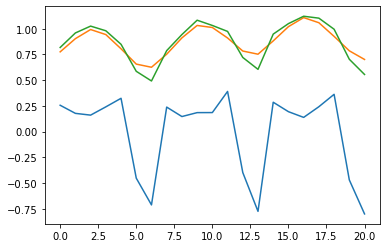

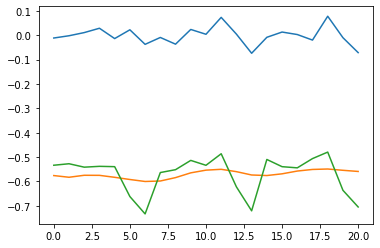

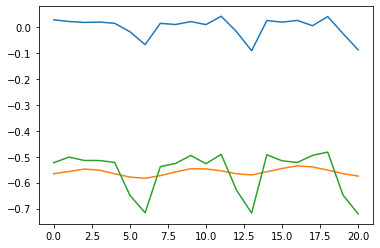

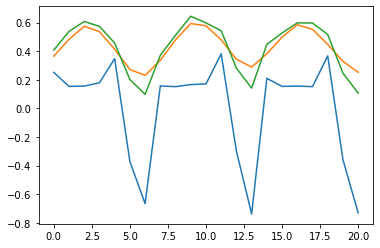

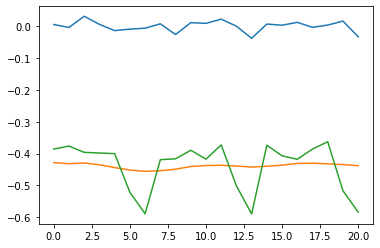

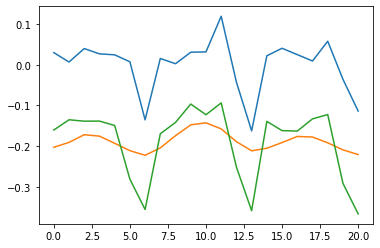

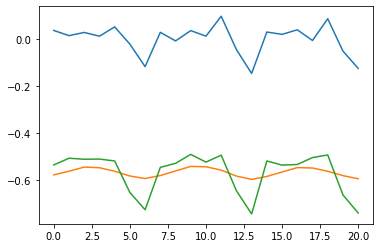

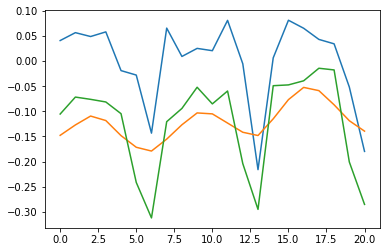

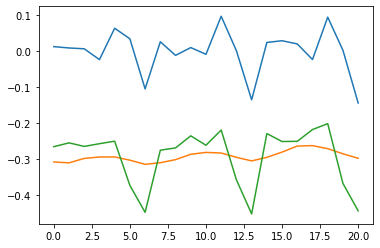

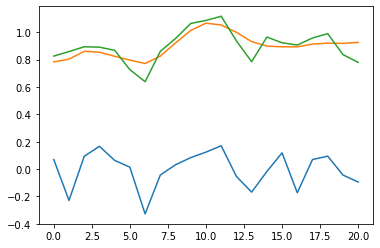

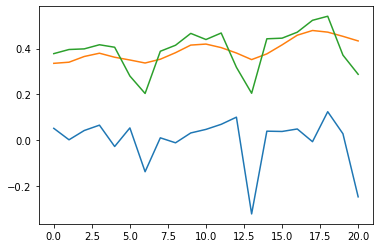

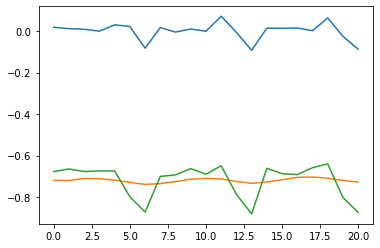

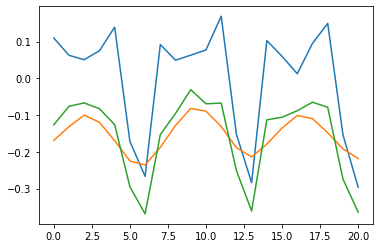

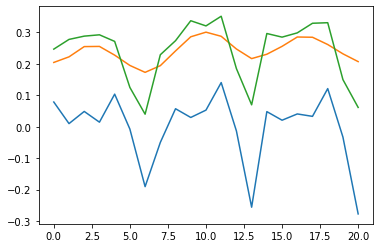

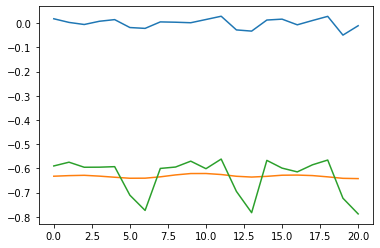

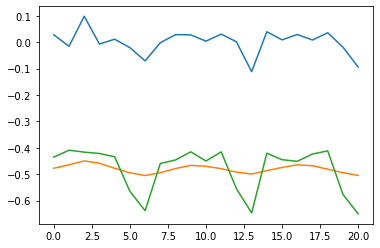

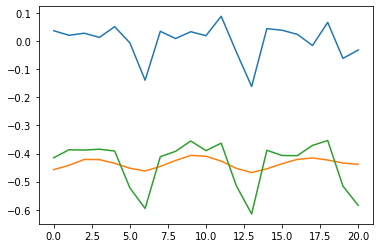

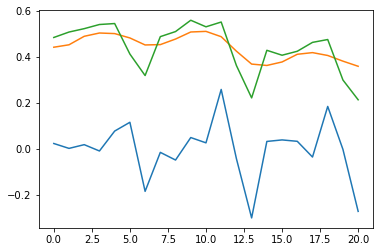

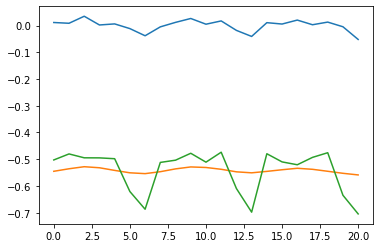

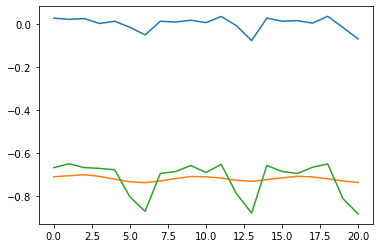

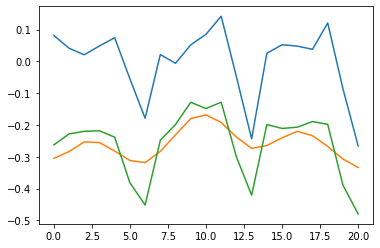

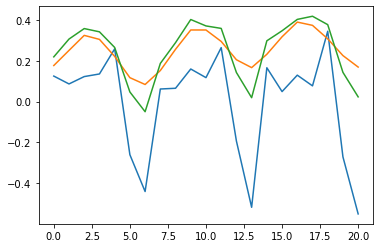

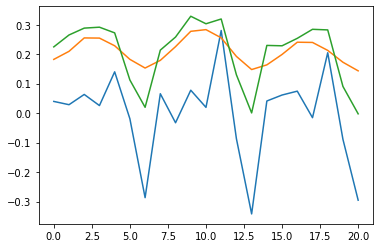

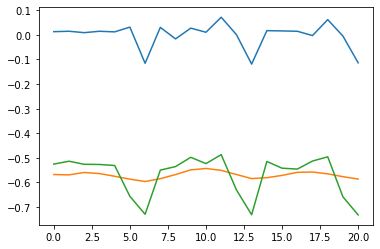

In [44]:
for i in range(69):
    plt.plot(x_time[i,:,-1])
    plt.plot(x_time[i,:,-2])
    plt.plot(x_time[i,:,-2]+ x_time[0,:,-1])
    plt.show()

In [45]:
path = 'data/preprocess/'
with open(path + 'evening_last_time.pkl', 'wb') as f:
    pickle.dump(x_time, f)
with open(path + 'evening_last_notime.pkl', 'wb') as f:
    pickle.dump(x_notime, f)